In [1]:
import random
from datetime import datetime as dt

# import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import pymc3 as pm
from scipy.special import expit
import seaborn as sns
import tensorflow as tf
import tensorflow_probability as tfp

%matplotlib inline

print(f"Using TensorFlow version: {tf.__version__}")
print(f"Using TensorFlow Probability version: {tfp.__version__}")

Using TensorFlow version: 2.4.1
Using TensorFlow Probability version: 0.12.1


In [2]:
devices = tf.config.experimental.get_visible_devices()
print(f"Devices: {devices}\n")
print(
    f"Logical Devices: {tf.config.experimental.list_logical_devices('GPU')}\n"
)

print(f"GPU Available: {tf.config.list_physical_devices('GPU')}\n")
print(f"All Pysical Devices: {tf.config.list_physical_devices()}")

# Set seed for repeatable results
# np.random.seed(123)
# tf.random.set_seed(456)

Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Logical Devices: [LogicalDevice(name='/device:GPU:0', device_type='GPU')]

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

All Pysical Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Some stat101 basic usage.

Source: https://towardsdatascience.com/intro-to-probabilistic-programming-b47c4e926ec5

In [6]:
tfd = tfp.distributions

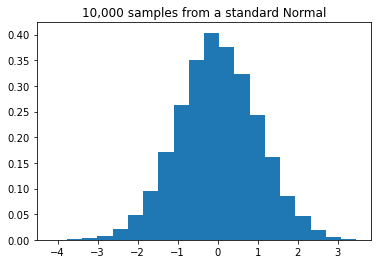

log(PDF) at 0: -0.9189


In [37]:
# A standard normal
normal = tfd.Normal(loc=0., scale=1.) # mean=0, std=3
value = 10000
samples = normal.sample(value)
plt.hist(samples.numpy(), bins=20, density=True)
plt.title(f"{value:,} samples from a standard Normal")
plt.show()

# log of the probability density/mass function evaluated at the given sample value.
value = 0
print("log(PDF) at {}: {:.4f}".format(value, normal.log_prob(value)))

In [35]:
# Define a single scalar Normal distribution.
dist = tfd.Normal(loc=0., scale=3.)  # mean=0, std=3
print(f"{dist}")
print(f"{dist.parameters}\n")

# Evaluate the cdf at 1, returning a scalar.
value = 1
print("CDF at {}:  {:.4f}\n".format(value, dist.cdf(value)))

# Define a batch of two scalar valued Normals.
# The first has mean 1 and standard deviation 11, the second 2 and 22.
dist = tfd.Normal(loc=[1, 2.], scale=[11, 22.])
print(f"{dist}")
print(f"{dist.parameters}\n")

# Evaluate the pdf of the first distribution on 0, and the second on 1.5,
# returning a length two tensor.
value = [0, 1.5]
print("PDF at {}:  {}\n".format(value, dist.prob(value)))

# Get 3 samples, returning a 3 x 2 tensor.
value = 3
print(
    "Get {0} samples, returning {0} x 2 tensor:\n\n{1}".format(
        value, dist.sample([value])
    )
)

tfp.distributions.Normal("Normal", batch_shape=[], event_shape=[], dtype=float32)
{'loc': 0.0, 'scale': 3.0, 'validate_args': False, 'allow_nan_stats': True, 'name': 'Normal'}

CDF at 1:  0.6306

tfp.distributions.Normal("Normal", batch_shape=[2], event_shape=[], dtype=float32)
{'loc': [1, 2.0], 'scale': [11, 22.0], 'validate_args': False, 'allow_nan_stats': True, 'name': 'Normal'}

PDF at [0, 1.5]:  [0.03611792 0.01812905]

Get 3 samples, returning 3 x 2 tensor:

[[ 17.041471    2.7682598]
 [ 15.810554  -19.082237 ]
 [  5.557813   18.668331 ]]


tfp.distributions.Normal("Normal", batch_shape=[2], event_shape=[], dtype=float32)
{'loc': [1, 2.0], 'scale': [11, 22.0], 'validate_args': False, 'allow_nan_stats': True, 'name': 'Normal'}

Batch shape: ()
Event shape: (2,)
Samples shape: (10000, 2)


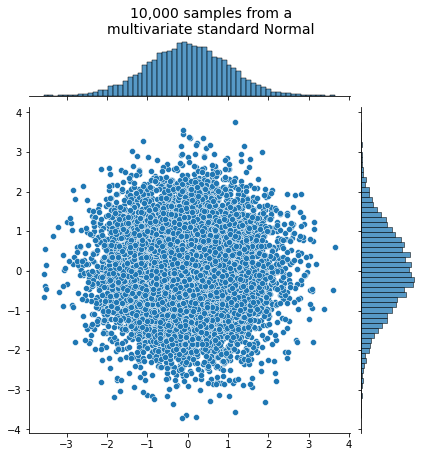

In [49]:
mvn = tfd.MultivariateNormalDiag(loc=[0., 0.], scale_diag = [1., 1.])
print(f"{dist}")
print(f"{dist.parameters}\n")

print("Batch shape:", mvn.batch_shape)
print("Event shape:", mvn.event_shape)

value = 10000
samples = mvn.sample(value)

print(
    "Samples shape:", samples.shape
)

g = sns.jointplot(x=samples[:, 0], y=samples[:, 1], kind='scatter')
g.fig.suptitle(
    f"{value:,} samples from a\nmultivariate standard Normal",
    y=1.05,
    fontsize=14,
)
plt.show()

In [29]:
dir(dist)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_variable_with_custom_getter',
 '_allow_nan_stats',
 '_batch_shape',
 '_batch_shape_tensor',
 '_call_cdf',
 '_call_log_cdf',
 '_call_log_prob',
 '_call_log_survival_function',
 '_call_prob',
 '_call_quantile',
 '_call_sample_n',
 '_call_survival_function',
 '_cdf',
 '_checkpoint_dependencies',
 '_composite_tensor_nonshape_params',
 '_composite_tensor_params',
 '_composite_tensor_shape_params',
 '_covariance',
 '_cross_entropy',
 '_default_event_space_bijector',
 '_deferred_dependencies',
 '_dtype',
 '_entropy',
 '_eve

In [32]:
print(dist)
print(dist.parameters)

tfp.distributions.Normal("Normal", batch_shape=[2], event_shape=[], dtype=float32)
{'loc': [1, 2.0], 'scale': [11, 22.0], 'validate_args': False, 'allow_nan_stats': True, 'name': 'Normal'}
